In [1]:
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, MobileNet
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

def load_data(path_data):
    data = []
    labels = []

    for label in os.listdir(path_data):
        path_label = os.path.join(path_data, label)
        for img in os.listdir(path_label):
            path_img = os.path.join(path_label, img)
            image = Image.open(path_img)
            image = image.resize((128, 128))
            image = image.convert('RGB')
            image = np.array(image)
            data.append(image)
            labels.append(1) if label == 'PNEUMONIA' else labels.append(0)

    return data, labels

# Paths
path = "/kaggle/input/chest-xray-pneumonia/chest_xray/"
path_train = path + 'train'
path_test = path + 'test'
path_val = path + 'val'

# Load data
x_train, y_train = load_data(path_train)
x_test, y_test = load_data(path_test)
x_val, y_val = load_data(path_val)

# Print data sizes
print(len(x_train))

X = np.array(x_train)
Y = np.array(y_train)
print(X.shape)
print(Y.shape)

x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)

X = X / 255

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


5216
(5216, 128, 128, 3)
(5216,)
(624, 128, 128, 3)
(624,)


29084464/29084464 [==============================] - 2s 0us/step
Epoch 1/15
59/59 [==============================] - 7s 30ms/step - loss: 0.6687 - accuracy: 0.5975 - val_loss: 0.6148 - val_accuracy: 0.7679
Epoch 2/15
59/59 [==============================] - 1s 16ms/step - loss: 0.6396 - accuracy: 0.6620 - val_loss: 0.5853 - val_accuracy: 0.7679
Epoch 3/15
59/59 [==============================] - 1s 16ms/step - loss: 0.6186 - accuracy: 0.6926 - val_loss: 0.5631 - val_accuracy: 0.7679
Epoch 4/15
59/59 [==============================] - 1s 16ms/step - loss: 0.5789 - accuracy: 0.7040 - val_loss: 0.4924 - val_accuracy: 0.7679
Epoch 5/15
59/59 [==============================] - 1s 16ms/step - loss: 0.5190 - accuracy: 0.7294 - val_loss: 0.3892 - val_accuracy: 0.7679
Epoch 6/15
59/59 [==============================] - 1s 16ms/step - loss: 0.4436 - accuracy: 0.7632 - val_loss: 0.3297 - val_accuracy: 0.8493
Epoch 7/15
59/59 [==============================] - 1s 16ms/step - loss: 0.3811 - accurac

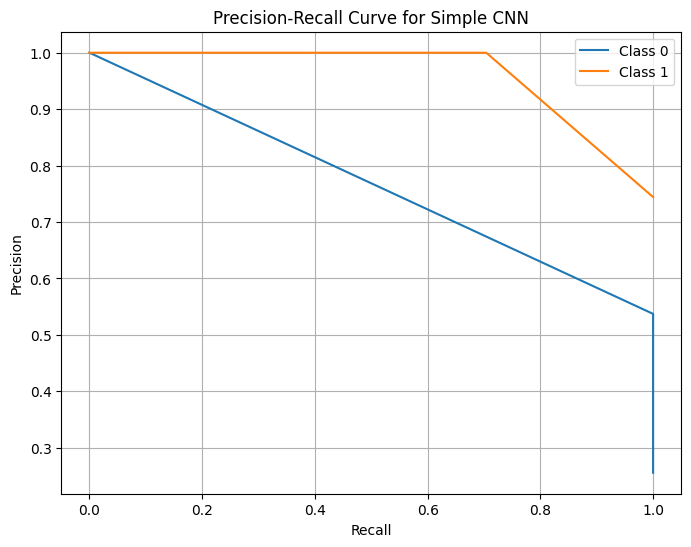

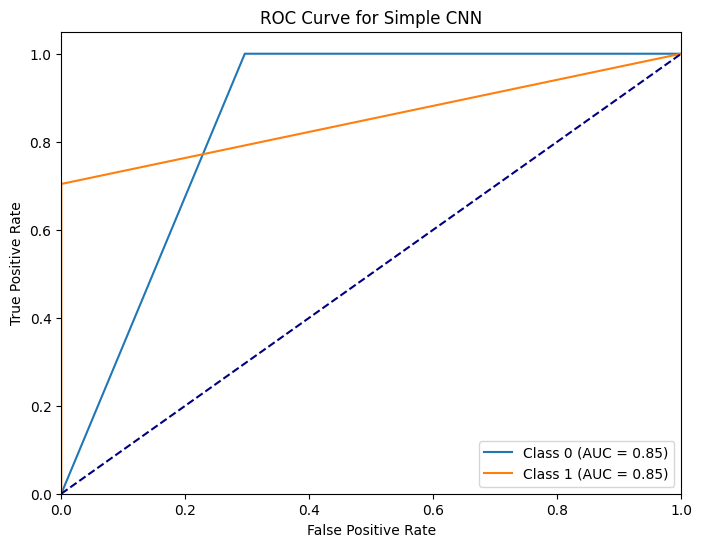

Epoch 1/15
59/59 [==============================] - 21s 202ms/step - loss: 0.3902 - accuracy: 0.8111 - val_loss: 0.7124 - val_accuracy: 0.8589
Epoch 2/15
59/59 [==============================] - 8s 137ms/step - loss: 0.2471 - accuracy: 0.8940 - val_loss: 0.2769 - val_accuracy: 0.8636
Epoch 3/15
59/59 [==============================] - 8s 137ms/step - loss: 0.2591 - accuracy: 0.8897 - val_loss: 0.2299 - val_accuracy: 0.9354
Epoch 4/15
59/59 [==============================] - 8s 137ms/step - loss: 0.1733 - accuracy: 0.9262 - val_loss: 0.1245 - val_accuracy: 0.9617
Epoch 5/15
59/59 [==============================] - 8s 137ms/step - loss: 0.1483 - accuracy: 0.9387 - val_loss: 0.1113 - val_accuracy: 0.9641
Epoch 6/15
59/59 [==============================] - 8s 137ms/step - loss: 0.1373 - accuracy: 0.9515 - val_loss: 0.1126 - val_accuracy: 0.9641
Epoch 7/15
59/59 [==============================] - 8s 137ms/step - loss: 0.1050 - accuracy: 0.9627 - val_loss: 0.3093 - val_accuracy: 0.9354
Epoch

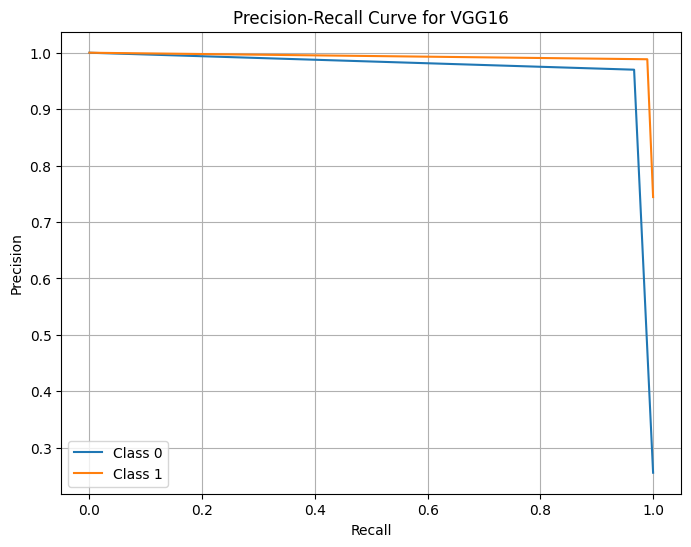

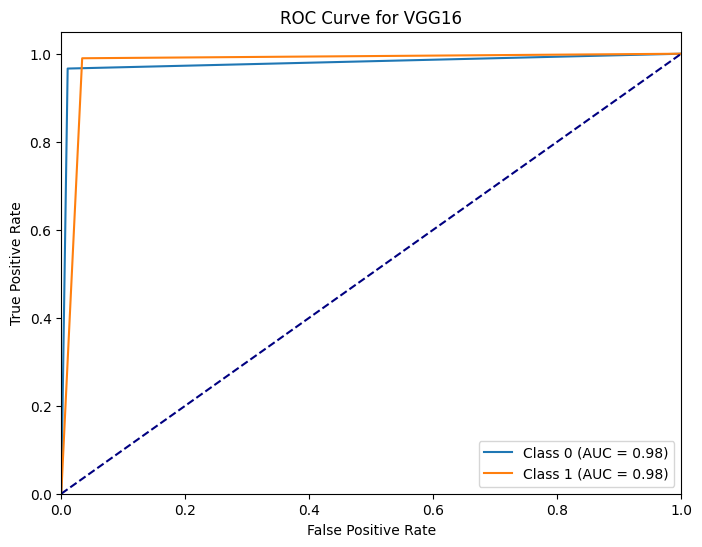

Epoch 1/15
59/59 [==============================] - 20s 82ms/step - loss: 0.6576 - accuracy: 0.7392 - val_loss: 0.3110 - val_accuracy: 0.8397
Epoch 2/15
59/59 [==============================] - 3s 56ms/step - loss: 0.3298 - accuracy: 0.8527 - val_loss: 0.4554 - val_accuracy: 0.8086
Epoch 3/15
59/59 [==============================] - 3s 57ms/step - loss: 0.2569 - accuracy: 0.8879 - val_loss: 0.5128 - val_accuracy: 0.8086
Epoch 4/15
59/59 [==============================] - 3s 56ms/step - loss: 0.2087 - accuracy: 0.9038 - val_loss: 0.5930 - val_accuracy: 0.8325
Epoch 5/15
59/59 [==============================] - 3s 56ms/step - loss: 0.1854 - accuracy: 0.9262 - val_loss: 0.3214 - val_accuracy: 0.8828
Epoch 6/15
59/59 [==============================] - 4s 62ms/step - loss: 0.1599 - accuracy: 0.9315 - val_loss: 0.1878 - val_accuracy: 0.9545
Epoch 7/15
59/59 [==============================] - 3s 56ms/step - loss: 0.1207 - accuracy: 0.9536 - val_loss: 0.1623 - val_accuracy: 0.9665
Epoch 8/15
5

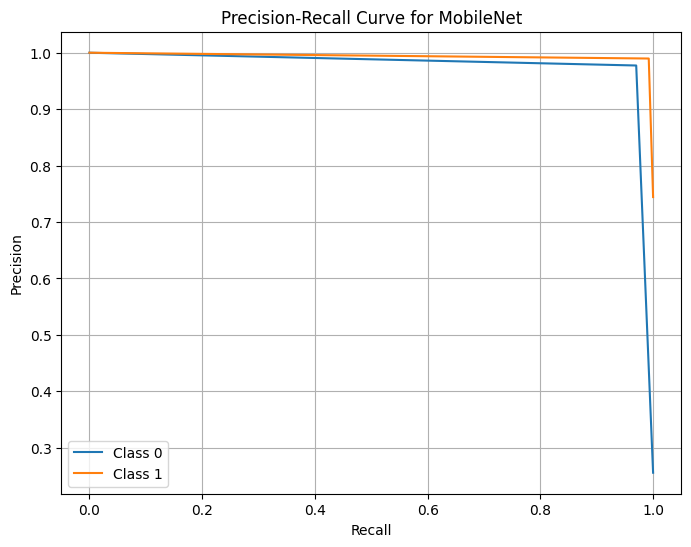

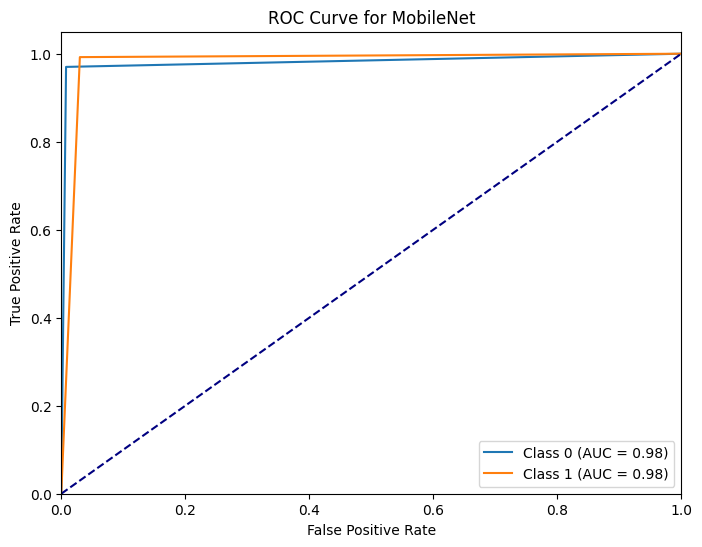

Epoch 1/15
59/59 [==============================] - 46s 182ms/step - loss: 0.6045 - accuracy: 0.6590 - val_loss: 0.6709 - val_accuracy: 0.7727
Epoch 2/15
59/59 [==============================] - 6s 101ms/step - loss: 0.3302 - accuracy: 0.8588 - val_loss: 0.1530 - val_accuracy: 0.9426
Epoch 3/15
59/59 [==============================] - 6s 101ms/step - loss: 0.1755 - accuracy: 0.9307 - val_loss: 0.1982 - val_accuracy: 0.9498
Epoch 4/15
59/59 [==============================] - 6s 101ms/step - loss: 0.1172 - accuracy: 0.9555 - val_loss: 0.1663 - val_accuracy: 0.9665
Epoch 5/15
59/59 [==============================] - 6s 100ms/step - loss: 0.0863 - accuracy: 0.9672 - val_loss: 0.2134 - val_accuracy: 0.9593
Epoch 6/15
59/59 [==============================] - 6s 101ms/step - loss: 0.0682 - accuracy: 0.9736 - val_loss: 0.2102 - val_accuracy: 0.9665
Epoch 7/15
59/59 [==============================] - 6s 101ms/step - loss: 0.0552 - accuracy: 0.9795 - val_loss: 0.1678 - val_accuracy: 0.9641
Epoch

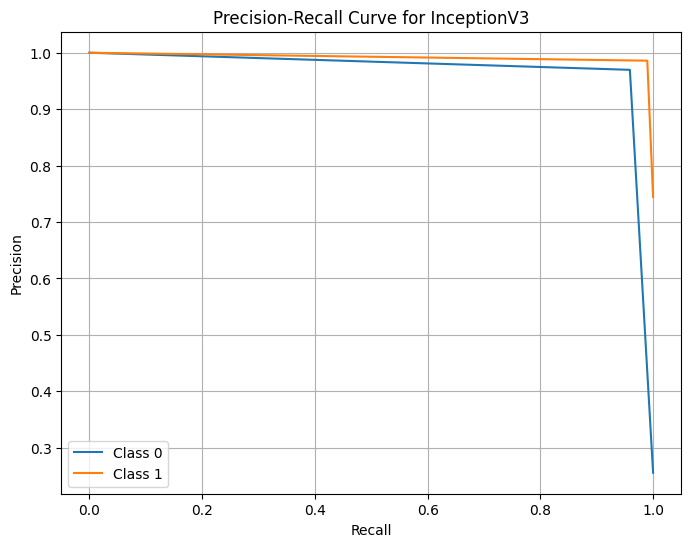

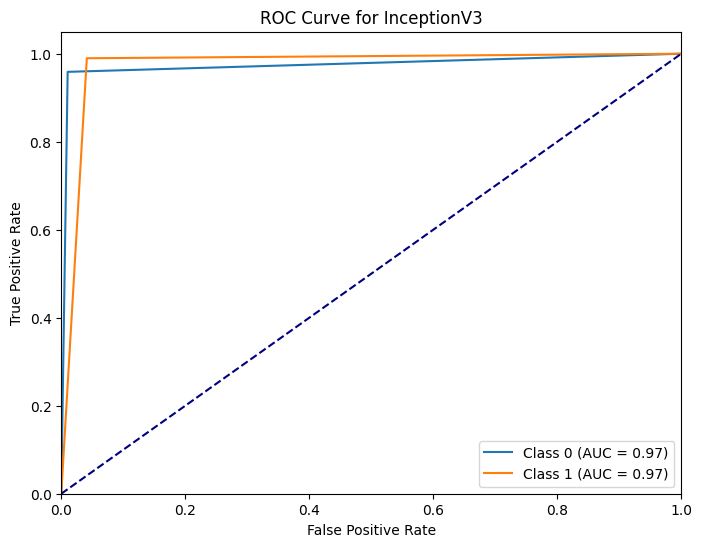

Epoch 1/15
59/59 [==============================] - 79s 248ms/step - loss: 0.5224 - accuracy: 0.7581 - val_loss: 0.4326 - val_accuracy: 0.8086
Epoch 2/15
59/59 [==============================] - 8s 140ms/step - loss: 0.3070 - accuracy: 0.8495 - val_loss: 0.5946 - val_accuracy: 0.8062
Epoch 3/15
59/59 [==============================] - 8s 141ms/step - loss: 0.2341 - accuracy: 0.8977 - val_loss: 0.2643 - val_accuracy: 0.9163
Epoch 4/15
59/59 [==============================] - 8s 141ms/step - loss: 0.1725 - accuracy: 0.9273 - val_loss: 0.3446 - val_accuracy: 0.8995
Epoch 5/15
59/59 [==============================] - 8s 139ms/step - loss: 0.1285 - accuracy: 0.9441 - val_loss: 0.2707 - val_accuracy: 0.9378
Epoch 6/15
59/59 [==============================] - 8s 140ms/step - loss: 0.1229 - accuracy: 0.9552 - val_loss: 0.3186 - val_accuracy: 0.9474
Epoch 7/15
59/59 [==============================] - 8s 141ms/step - loss: 0.0992 - accuracy: 0.9600 - val_loss: 0.1934 - val_accuracy: 0.9569
Epoch

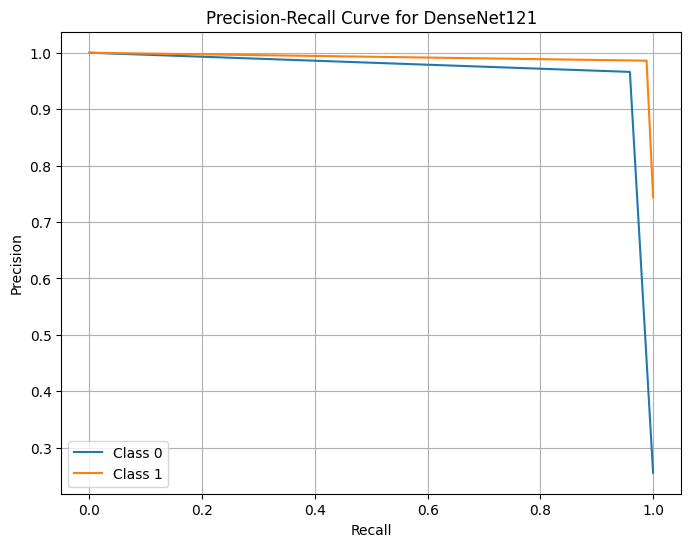

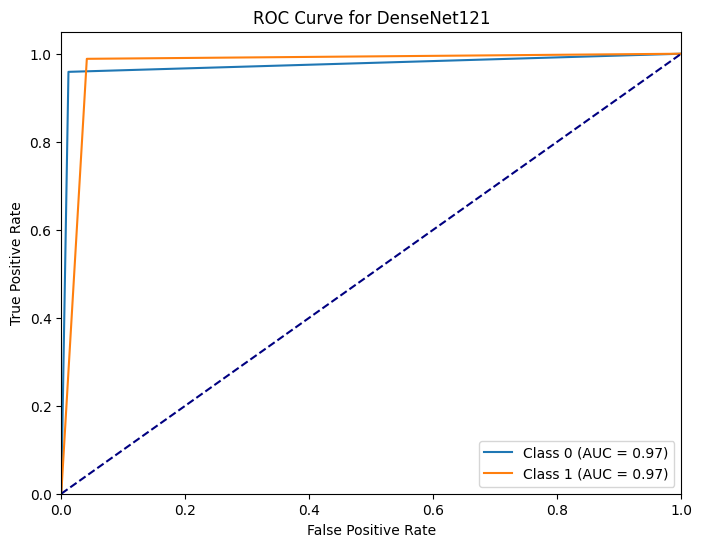

In [2]:
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.applications import VGG16, MobileNet, ResNet50, InceptionV3, DenseNet121
from keras.preprocessing.image import img_to_array, array_to_img
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming X, Y are your data and labels
# Split the data into training and testing sets
X, x_test, Y, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

model_acc=[]
model_pre=[]
model_rec=[]
model_f1=[]
model_cm=[]

history = {}

# Model - Simple CNN
model_cnn = Sequential()
model_cnn.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(128, 128, 3)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(32, (3, 3), 1, activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, (3, 3), 1, activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(128, (3, 3), 1, activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))


# Model - VGG16
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
model_vgg16 = Sequential()
model_vgg16.add(base_model_vgg16)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(128, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(64, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(32, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(1, activation='sigmoid'))

# Model - MobileNet
base_model_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
model_mobilenet = Sequential()
model_mobilenet.add(base_model_mobilenet)
model_mobilenet.add(Flatten())
model_mobilenet.add(Dense(128, activation='relu'))
model_mobilenet.add(Dropout(0.5))
model_mobilenet.add(Dense(64, activation='relu'))
model_mobilenet.add(Dropout(0.5))
model_mobilenet.add(Dense(32, activation='relu'))
model_mobilenet.add(Dropout(0.5))
model_mobilenet.add(Dense(1, activation='sigmoid'))

# Model - InceptionV3
base_model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
model_inceptionv3 = Sequential()
model_inceptionv3.add(base_model_inceptionv3)
model_inceptionv3.add(Flatten())
model_inceptionv3.add(Dense(128, activation='relu'))
model_inceptionv3.add(Dropout(0.5))
model_inceptionv3.add(Dense(64, activation='relu'))
model_inceptionv3.add(Dropout(0.5))
model_inceptionv3.add(Dense(32, activation='relu'))
model_inceptionv3.add(Dropout(0.5))
model_inceptionv3.add(Dense(1, activation='sigmoid'))

# Model - DenseNet121
base_model_densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
model_densenet121 = Sequential()
model_densenet121.add(base_model_densenet121)
model_densenet121.add(Flatten())
model_densenet121.add(Dense(128, activation='relu'))
model_densenet121.add(Dropout(0.5))
model_densenet121.add(Dense(64, activation='relu'))
model_densenet121.add(Dropout(0.5))
model_densenet121.add(Dense(32, activation='relu'))
model_densenet121.add(Dropout(0.5))
model_densenet121.add(Dense(1, activation='sigmoid'))

# List of models
models = {
    'Simple CNN': model_cnn,
    'VGG16': model_vgg16,
    'MobileNet': model_mobilenet,
    'InceptionV3': model_inceptionv3,
    'DenseNet121': model_densenet121
}

# Training and Evaluation
for model_name, model in models.items():
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    history[model_name] = model.fit(X, Y, epochs=15, batch_size=64, validation_split=0.1)
    
    # Evaluation on test set
    y_pred = model.predict(x_test)
    y_pred = np.round(y_pred)

    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_test, y_pred)

    model_acc.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    model_pre.append(precision_score(y_test, y_pred, average='weighted'))
    model_rec.append(recall_score(y_test, y_pred, average='weighted'))
    model_f1.append(f1_score(y_test, y_pred, average='weighted'))
    model_cm.append(confusion_matrix(y_test, y_pred))
    # Print or store metrics as needed
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Confusion Matrix:\n{confusion_mat}\n')

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.grid(True)
    classes = [0, 1]
    # Calculate precision-recall curve for each class
    for i in range(len(classes)):
        precision, recall, _ = precision_recall_curve(y_test == classes[i], y_pred == classes[i])
        plt.plot(recall, precision, label=f'Class {classes[i]}')

    plt.legend()
    plt.savefig(f'{model_name}_precision_recall.png')
    plt.show()

    # Plot ROC Curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test == classes[i], y_pred == classes[i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.savefig(f'{model_name}_ROC_curve.png')
    plt.show()

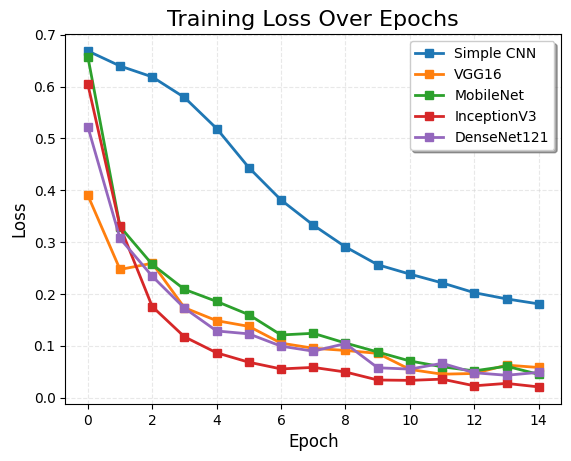

In [3]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plotting loop
for i, key in enumerate(history.keys()):
    plt.plot(history[key].history['loss'], label=key, color=colors[i % len(colors)], linestyle='-', linewidth=2 ,marker='s')

# Set plot labels and title
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Over Epochs', fontsize=16)

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.5, color='lightgray')

# Customize legend with a better location and shadow
plt.legend(loc='upper right', fontsize=10, shadow=True)

# Adjust the size of ticks on both axes
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('Training Loss Over Epochs.png', dpi=300)

# Show the plot
plt.show()

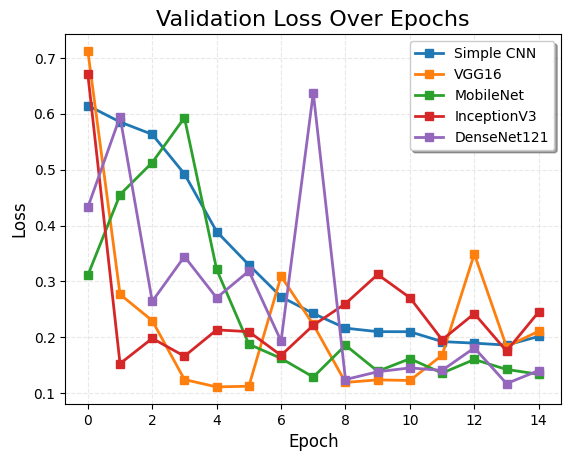

In [4]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plotting loop
for i, key in enumerate(history.keys()):
    plt.plot(history[key].history['val_loss'], label=key, color=colors[i % len(colors)], linestyle='-', linewidth=2 ,marker='s')

# Set plot labels and title
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Validation Loss Over Epochs', fontsize=16)

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.5, color='lightgray')

# Customize legend with a better location and shadow
plt.legend(loc='upper right', fontsize=10, shadow=True)

# Adjust the size of ticks on both axes
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('Validation Loss Over Epochs.png', dpi=300)

# Show the plot
plt.show()

In [9]:
import plotly.express as px
import plotly.colors

# Assuming you have an optimizer list corresponding to each dataset
optimizers = ['Simple CNN', 'VGG16', 'MobileNet', 'InceptionV3','DenseNet121']

accuracy = []

# Extract R2 values from history
for i, key in enumerate(history.keys()):
    accuracy.append(history[key].history['accuracy'])

# Choose a colormap for distinct colors
colormap = plotly.colors.qualitative.Set2

# Create the initial line trace with labels
fig = px.line(x=range(1,len(accuracy[0])+1), y=accuracy[0], line_shape='linear')

# Update the initial trace to fill the area between the line and the axis
fig.update_traces(fill='tozeroy', line_color=colormap[0], name=optimizers[0])

# Add additional line traces for other datasets with unique colors and labels
for i in range(1, len(accuracy)):
    fig.add_trace(px.line(x=range(1,len(accuracy[0])+1), y=accuracy[i], line_shape='linear')
                  .update_traces(fill='tonexty', line_color=colormap[i], name=optimizers[i]).data[0])


legend_data = [{'label': optimizer, 'color': colormap[i]} for i, optimizer in enumerate(optimizers)]

# Update layout for a cleaner appearance and set figure size to (12,12)
fig.update_layout(
    title='Accuracy for Training Data',
    xaxis_title='Epoch',
    yaxis_title='Accuracy',
#     legend_title='Optimizers',
    font=dict(family='Arial', size=14, color='dark blue'),
    legend=dict(x=1.02, y=0.95, traceorder='normal'),
    plot_bgcolor='white',
    annotations=[
        dict(
            x=1.15,
            y=0.9 - i * 0.1,
            xref='paper',
            yref='paper',
            text=f"{optimizer['label']}",
            showarrow=False,
            font=dict(color=optimizer['color'])
        ) for i, optimizer in enumerate(legend_data)
    ]
)

# Set figure size to (12, 12)
fig.update_layout(width=700, height=700)
fig.update_yaxes(range=[0.60, 1])

# Show the plot
fig.show()


In [10]:
import plotly.express as px
import plotly.colors

# Assuming you have an optimizer list corresponding to each dataset
optimizers = ['Simple CNN', 'VGG16', 'MobileNet', 'InceptionV3','DenseNet121']

accuracy = []

# Extract R2 values from history
for i, key in enumerate(history.keys()):
    accuracy.append(history[key].history['val_accuracy'])

# Choose a colormap for distinct colors
colormap = plotly.colors.qualitative.Set2

# Create the initial line trace with labels
fig = px.line(x=range(1,len(accuracy[0])+1), y=accuracy[0], line_shape='linear')

# Update the initial trace to fill the area between the line and the axis
fig.update_traces(fill='tozeroy', line_color=colormap[0], name=optimizers[0])

# Add additional line traces for other datasets with unique colors and labels
for i in range(1, len(accuracy)):
    fig.add_trace(px.line(x=range(1,len(accuracy[0])+1), y=accuracy[i], line_shape='linear')
                  .update_traces(fill='tonexty', line_color=colormap[i], name=optimizers[i]).data[0])


legend_data = [{'label': optimizer, 'color': colormap[i]} for i, optimizer in enumerate(optimizers)]

# Update layout for a cleaner appearance and set figure size to (12,12)
fig.update_layout(
    title='Validation Accuracy for Validation Data',
    xaxis_title='Epoch',
    yaxis_title='Validation Accuracy',
    #legend_title='Optimizers',
    font=dict(family='Arial', size=14, color='dark blue'),
    legend=dict(x=1.02, y=0.95, traceorder='normal'),
    plot_bgcolor='white',
    annotations=[
        dict(
            x=1.15,
            y=0.9 - i * 0.1,
            xref='paper',
            yref='paper',
            text=f"{optimizer['label']}",
            showarrow=False,
            font=dict(color=optimizer['color'])
        ) for i, optimizer in enumerate(legend_data)
    ]
)

# Set figure size to (12, 12)
fig.update_layout(width=700, height=700)
fig.update_yaxes(range=[0.60, 1])

# Show the plot
fig.show()

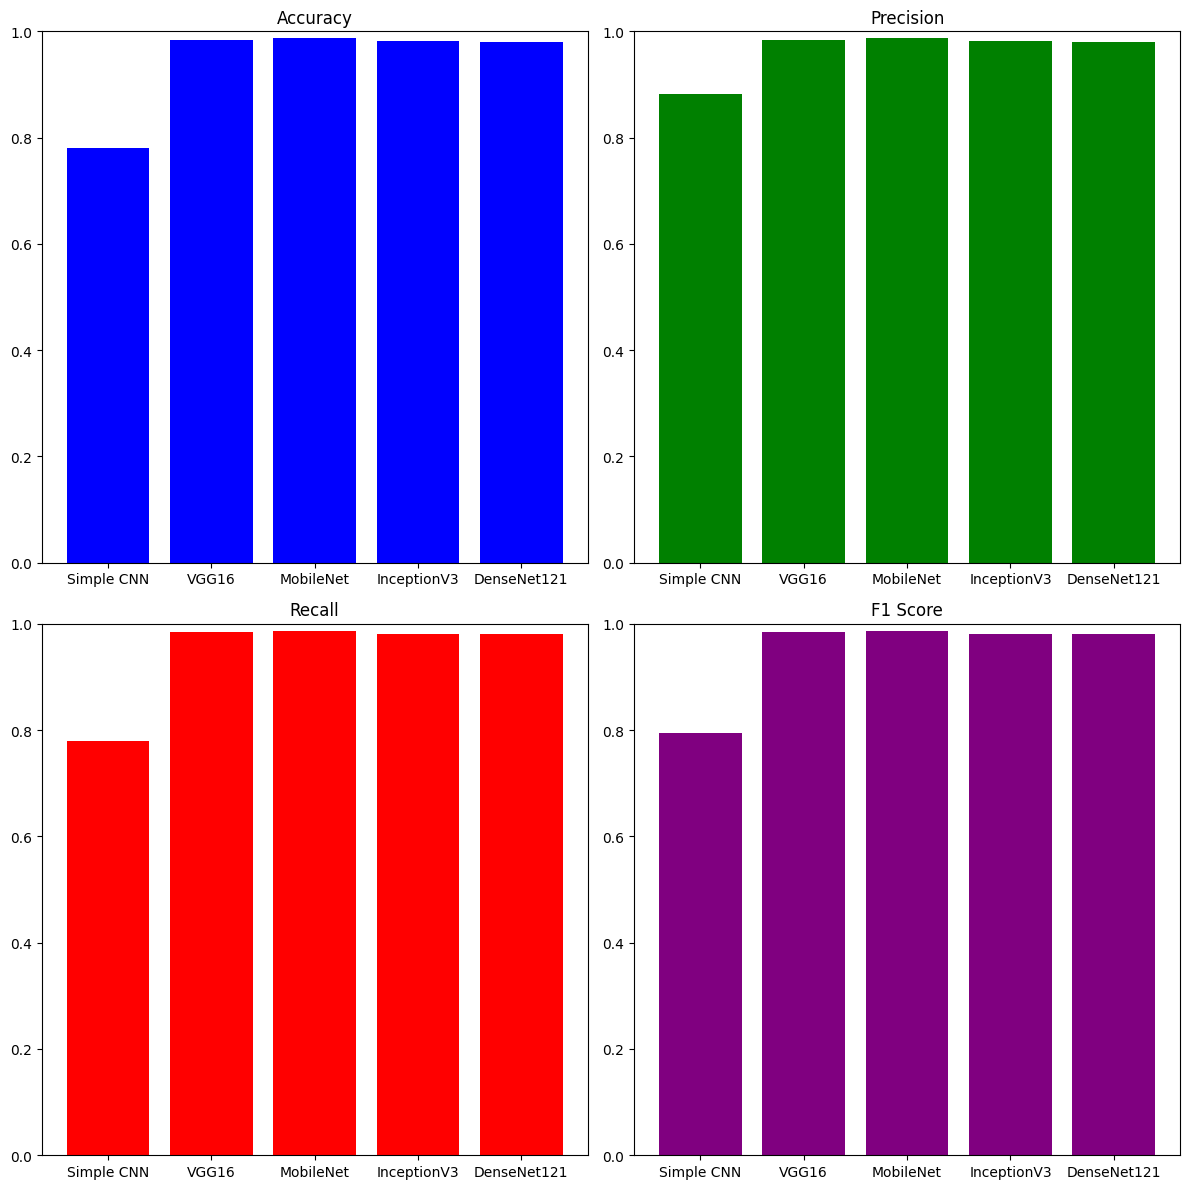

In [7]:
# results_df = pd.DataFrame(all_results)
# print(results_df)

# Extracting metric values from results_df
# parameters = results_df['Model']
# accuracy = results_df['Accuracy']
# precision = results_df['Precision']
# recall = results_df['Recall']
# f1 = results_df['F1 Score']

# Subplotting Parameters
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].bar(optimizers, model_acc, color='blue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim(0, 1)

axs[0, 1].bar(optimizers, model_pre, color='green')
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylim(0, 1)

axs[1, 0].bar(optimizers, model_rec, color='red')
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylim(0, 1)

axs[1, 1].bar(optimizers, model_f1, color='purple')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylim(0, 1)

plt.tight_layout()
plt.savefig('accuracy_precision_recall_F1Score.png')
plt.show()

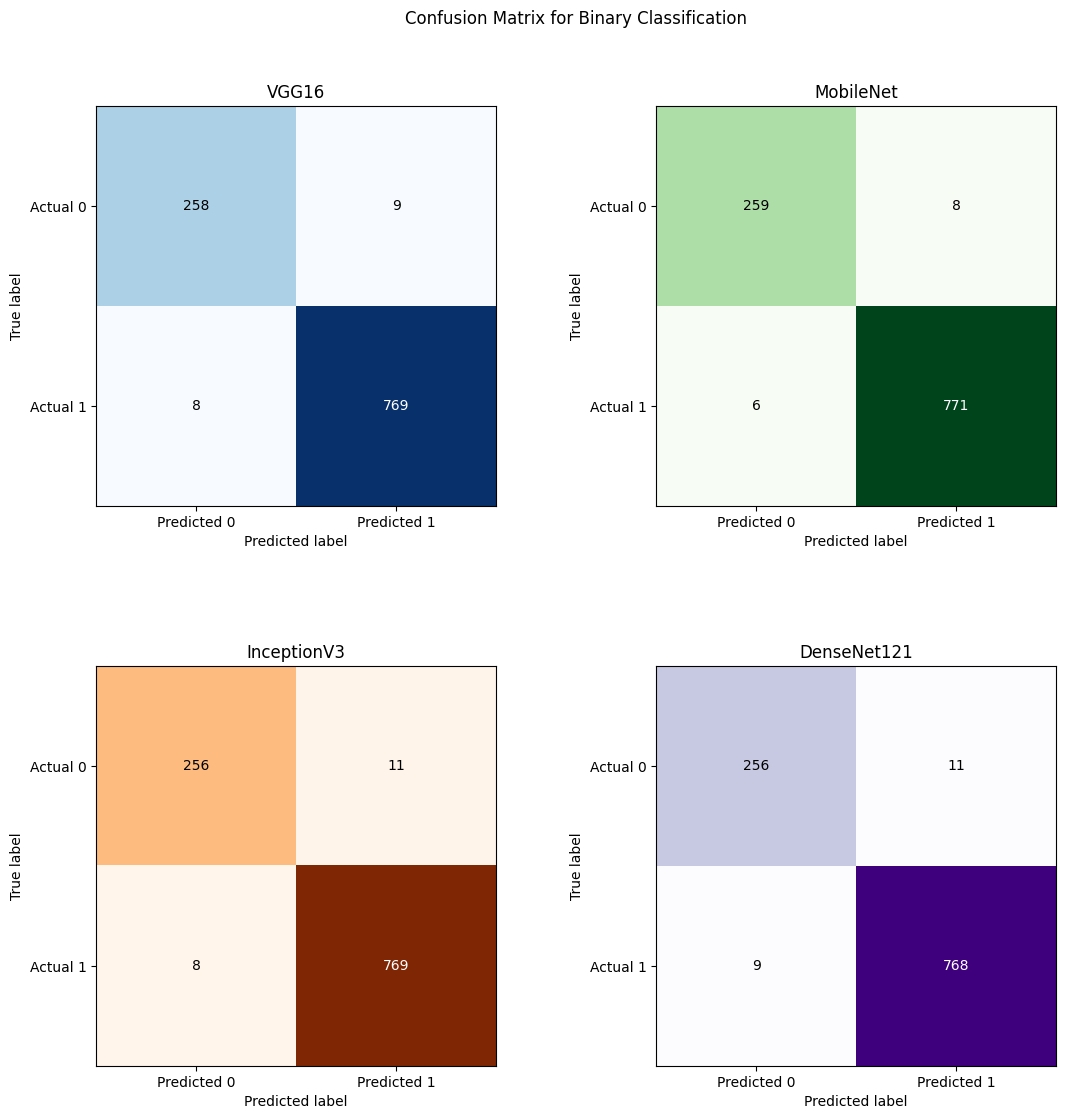

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these matrices with your actual confusion matrices
confusion_matrices = [
    np.array([[258 ,9],[  8 ,769]]),
    np.array([[259 ,  8],[  6 , 771]]),
    np.array([[256 ,11],[  8, 769]]),
    np.array([[256 , 11],[  9 , 768]])
]

optimizers = ['VGG16', 'MobileNet', 'InceptionV3','DenseNet121']
colors = ['Blues', 'Greens', 'Oranges', 'Purples']  # Choose different colors for each optimizer

# Create a square figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Confusion Matrix for Binary Classification', fontsize=12)

for i, (optimizer, cm, color) in enumerate(zip(optimizers, confusion_matrices, colors)):
    # Plot confusion matrix with different colors
    ax = axes[i // 2, i % 2]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.get_cmap(color))
    
    # Add labels
    ax.set_title(optimizer)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Predicted 0', 'Predicted 1'])
    ax.set_yticklabels(['Actual 0', 'Actual 1'])
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    
    # Add text annotations
    for m in range(2):
        for n in range(2):
            ax.text(n, m, str(cm[m, n]), ha='center', va='center', color='white' if cm[m, n] > cm.max() / 2 else 'black')

# Add colorbar
# cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='vertical', pad=0.1)
# cbar.set_label('Number of Samples')

# Adjust layout manually
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.savefig('confusion_matrix2.png')
plt.show()
